In [1]:
import pandas as pd
%matplotlib inline

In [2]:
file = "2016_kona_pronostics.csv"

In [3]:
df = pd.read_csv(file, delimiter=';', encoding = "ISO-8859-1")

In [4]:
# check list line of input file
df.tail(1)

,Player,Athlete1,Athlete2,Athlete3,Athlete4,Athlete5,Athlete6,Datetime
212,mverniau,FRO,KIE,VIE,VANL,SAN,MCN,2016-10-02 12:22:11


In [5]:
# pronostiques quant au vainqueur
df.Athlete1.value_counts(normalize=True).head(10)

FRO     0.690141
KIE     0.112676
RAE     0.070423
THOM    0.023474
HOF     0.014085
ODO     0.014085
SAN     0.014085
MCK     0.014085
RAN     0.004695
BRA     0.004695
Name: Athlete1, dtype: float64

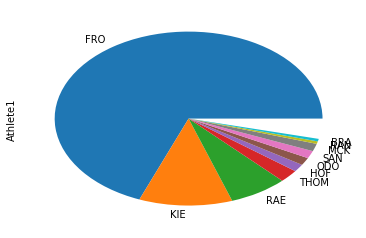

In [6]:
df.Athlete1.value_counts(normalize=True).head(10).plot(kind='pie')

In [7]:
df.Athlete2.value_counts(normalize=True).head(10)

KIE     0.399061
FRO     0.140845
VIE     0.056338
SAN     0.051643
HOF     0.046948
POTT    0.042254
BOE     0.037559
RAE     0.037559
VANL    0.032864
ODO     0.023474
Name: Athlete2, dtype: float64

In [8]:
df.Athlete3.value_counts(normalize=True).head(10)

VIE     0.197183
KIE     0.140845
RAE     0.107981
VANL    0.093897
FRO     0.084507
SAN     0.061033
HOF     0.037559
STE     0.032864
CUN     0.028169
POTT    0.028169
Name: Athlete3, dtype: float64

In [9]:
df.Athlete4.value_counts(normalize=True).head(10)

VIE     0.215962
VANL    0.098592
RAE     0.093897
KIE     0.070423
POTT    0.061033
SAN     0.056338
HOF     0.046948
CUN     0.046948
THOM    0.037559
FRO     0.028169
Name: Athlete4, dtype: float64

In [10]:
df.Athlete5.value_counts(normalize=True).head(10)

VIE     0.140845
KIE     0.089202
SAN     0.089202
RAE     0.079812
VANL    0.070423
ODO     0.056338
POTT    0.051643
HOF     0.042254
STE     0.037559
THOM    0.032864
Name: Athlete5, dtype: float64

In [11]:
df.Athlete6.value_counts(normalize=True).head(10)

VIE     0.117371
VANL    0.089202
POTT    0.079812
SAN     0.079812
KIE     0.070423
CUN     0.065728
CHE     0.056338
RAE     0.051643
HOF     0.032864
STE     0.028169
Name: Athlete6, dtype: float64

In [12]:
#10 pts par bonne position.
#6 pts pour 1 athlète qui termine à 1 place de ton pronostic.
#4 pts pour 1 athlète qui termine à 2 places de ton pronostic.
#2 pts pour 1 athlète qui termine à 3 places de ton pronostic.
#1 pts pour 1 athlète qui termine à 4 places de ton pronostic.
def calculate_points(player):
    
    points_1 = 0
    points_2 = 0
    points_3 = 0
    points_4 = 0
    points_5 = 0
    points_6 = 0
    
    # if athlete estimated as 1st arrived 1st
    if player.Athlete1 == results[1]:
        points_1 = 10 
    # if athlete estimated as 1st arrived 2nd
    elif player.Athlete1 == results[2]:
        points_1 = 6 
    # if athlete estimated as 1st arrived 3rd
    elif player.Athlete1 == results[3]:
        points_1 = 4 
    # if athlete estimated as 1st arrived 4th
    elif player.Athlete1 == results[4]:
        points_1 = 2 
    # if athlete estimated as 1st arrived 5th
    elif player.Athlete1 == results[5]:
        points_1 = 1 
        
    # if athlete estimated as 2nd arrived 1st
    if player.Athlete2 == results[1]:
        points_2 = 6 
    # if athlete estimated as 2nd arrived 2nd
    elif player.Athlete2 == results[2]:
        points_2 = 10 
    # ...
    elif player.Athlete2 == results[3]:
        points_2 = 6 
    elif player.Athlete2 == results[4]:
        points_2 = 4 
    elif player.Athlete2 == results[5]:
        points_2 = 2 
    elif player.Athlete2 == results[6]:
        points_2 = 1 
 
    if player.Athlete3 == results[1]:
        points_3 = 4 
    elif player.Athlete3 == results[2]:
        points_3 = 6 
    elif player.Athlete3 == results[3]:
        points_3 = 10 
    elif player.Athlete3 == results[4]:
        points_3 = 6
    elif player.Athlete3 == results[5]:
        points_3 = 4 
    elif player.Athlete3 == results[6]:
        points_3 = 2 
    elif player.Athlete3 == results[7]:
        points_3 = 1 
    
    if player.Athlete4 == results[1]:
        points_4 = 2 
    elif player.Athlete4 == results[2]:
        points_4 = 4 
    elif player.Athlete4 == results[3]:
        points_4 = 6 
    elif player.Athlete4 == results[4]:
        points_4 = 10 
    elif player.Athlete4 == results[5]:
        points_4 = 6 
    elif player.Athlete4 == results[6]:
        points_4 = 4 
    elif player.Athlete4 == results[7]:
        points_4 = 2 
    elif player.Athlete4 == results[8]:
        points_4 = 1 
        
    if player.Athlete5 == results[1]:
        points_5 = 1 
    elif player.Athlete5 == results[2]:
        points_5 = 2 
    elif player.Athlete5 == results[3]:
        points_5 = 4 
    elif player.Athlete5 == results[4]:
        points_5 = 6
    elif player.Athlete5 == results[5]:
        points_5 = 10
    elif player.Athlete5 == results[6]:
        points_5 = 6 
    elif player.Athlete5 == results[7]:
        points_5 = 4 
    elif player.Athlete5 == results[8]:
        points_5 = 2 
    elif player.Athlete5 == results[9]:
        points_5 = 1 

    if player.Athlete6 == results[1]:
        points_6 = 0 
    elif player.Athlete6 == results[2]:
        points_6 = 1 
    elif player.Athlete6 == results[3]:
        points_6 = 2 
    elif player.Athlete6 == results[4]:
        points_6 = 4 
    elif player.Athlete6 == results[5]:
        points_6 = 6 
    elif player.Athlete6 == results[6]:
        points_6 = 10 
    elif player.Athlete6 == results[7]:
        points_6 = 6 
    elif player.Athlete6 == results[8]:
        points_6 = 4 
    elif player.Athlete6 == results[9]:
        points_6 = 2 
    elif player.Athlete6 == results[10]:
        points_6 = 1 
         
        
    return points_1 + points_2 + points_3 + points_4 + points_5 + points_6


In [13]:
# 2016 results from http://eu.ironman.com/triathlon/events/americas/ironman/world-championship/results.aspx?rd=20161008 
results = {1:'FRO', 2:'KIE', 3:'LAN', 4:'HOF', 5:'BOE', 6:'ODO', 7:'STE', 8:'AER', 9:'RAN', 10:'VANL'}
res = pd.Series(results)

# add a column containing the obtained points for each gamer
df['Points'] = df.apply(calculate_points, axis=1)

# check list line
df.tail(1)

,Player,Athlete1,Athlete2,Athlete3,Athlete4,Athlete5,Athlete6,Datetime,Points
212,mverniau,FRO,KIE,VIE,VANL,SAN,MCN,2016-10-02 12:22:11,20


In [14]:
# sort the lines of players by decreasing order of Points (i.e. winner in first line)
df = df.sort_values(by ='Points', ascending=False)

# reset index of the line so that the index (aka "first hidden column") represents the final ranking
df = df.reset_index(drop=True)

# display the best 15 players (still decreasing order)
df.head(15)

,Player,Athlete1,Athlete2,Athlete3,Athlete4,Athlete5,Athlete6,Datetime,Points
0,Matt,FRO,KIE,VIE,HOF,STE,AER,2016-10-02 12:41:45,38
1,Guillaume Belgy,FRO,KIE,VANL,HOF,ODO,VIE,2016-10-03 07:56:35,36
2,max,FRO,KIE,HOF,RAE,BOE,VIE,2016-10-02 15:17:56,36
3,dff,FRO,KIE,VIE,RAE,ODO,STE,2016-10-04 12:31:01,32
4,JOFFRE,FRO,KIE,VIE,VANL,HOF,STE,2016-10-02 13:15:30,32
5,Henry matthieu,FRO,KIE,VIE,ODO,HOF,VANL,2016-10-02 12:26:07,31
6,Nicolas ZAMBON,FRO,KIE,BUTT,HOF,WEI,VIE,2016-10-02 18:26:26,30
7,Eric,FRO,KIE,CHE,HOF,RAE,VIE,2016-10-03 13:23:26,30
8,Balestreri,FRO,KIE,WEI,BOE,STE,CUN,2016-10-03 00:37:37,30
9,TriRating,FRO,KIE,RAE,MCM,POTT,ODO,2017-10-11 08:30:00,30


In [15]:
# Display the ranking of 'TriRating' prognostic
df[df.Player == 'TriRating']
# It shows that TriRating prognostic was in the top-10

,Player,Athlete1,Athlete2,Athlete3,Athlete4,Athlete5,Athlete6,Datetime,Points
9,TriRating,FRO,KIE,RAE,MCM,POTT,ODO,2017-10-11 08:30:00,30


In [16]:
# display the total number of players (same as number of lines in the input file)
df.shape[0]

213

In [17]:
# save resuts within a CSV file
file2 = "2016_kona_pronostics_classement.csv"
df.to_csv(file2, sep=';', encoding = "ISO-8859-1", index=False)